In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!pip install -r ../requirements.txt

In [3]:
import src
import numpy as np
from src.paths import MODELS_DIR
import os
import torch
import pandas as pd
from src.data.process_data import process_open_ended, process_wave_data,process_open_ended_new
from src.data.read_data import load_raw_survey_data, read_stata_file
from src.paths import CODING_DIR, GLES_DIR, PROCESSED_DATA_DIR, ANNOTATED_GENERATIONS_DIR,RAW_DATA_DIR
from src.utils import get_lang
import warnings
warnings.filterwarnings('ignore')
from src.paths import RESULTS_DIR
classid2trainid = {int(classname):idx  for idx, classname in enumerate(sorted(pd.read_csv(os.path.join(CODING_DIR,'map.csv')).upperclass_id.unique())) }
df_lookup= pd.read_csv(os.path.join(CODING_DIR,'map.csv'))
label2str= dict(zip(df_lookup.upperclass_id,df_lookup.upperclass_name))
label_names= [label2str[i] for i in range(0,len(label2str)) ]

labels_16= [label_name for label_name in label_names if label_name!='LLM refusal']
label_names= [label2str[i] for i in range(0,len(label2str)) ]
labels_14= [label_name for label_name in label_names if label_name not in ['LLM refusal' ,'keine Angabe','weiß nich'] ]


In [5]:
import time
import pandas as pd

from src.analysis.data_processing import get_demographics_and_labels, get_demographics_and_llm_labels, get_wave_demographics
from src.analysis.experiment_utils import get_JS_experiment, get_MI_experiment, get_experiment_entropy
from src.analysis.metrics import calculate_pmf_by_groups, calculate_pmf_population, get_entropy_JS_corr_data,get_cramerV, get_cramerV_multiclass, get_population_level_ape_results
from src.analysis.waveExperiment.utils import   get_waveExperiment_data
from src.analysis.data_processing import social_group_to_category,social_category_to_group
from src.analysis.waveExperiment.utils import   get_waveExperiment_data

from src.analysis.waveExperiment.plots import *

from src.analysis.modelExperiment.utils import get_modelExperiment_data

# Loading Experiment 1,2,3 data

/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/google-gemma-7b-it_12_1712704376_modified


100%|██████████| 9306/9306 [00:00<00:00, 17334.28it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/Llama2_all


100%|██████████| 9306/9306 [00:01<00:00, 6219.53it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173


100%|██████████| 9306/9306 [00:00<00:00, 9335.16it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/Llama2_all


100%|██████████| 9306/9306 [00:00<00:00, 23401.69it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/13/Llama2_all


100%|██████████| 9221/9221 [00:01<00:00, 6374.69it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/14/Llama2_all


100%|██████████| 8319/8319 [00:01<00:00, 7768.61it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/15/Llama2_all


100%|██████████| 15080/15080 [00:02<00:00, 6946.74it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/16/Llama2_all


100%|██████████| 14527/14527 [00:00<00:00, 58152.70it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/17/Llama2_all


100%|██████████| 13210/13210 [00:01<00:00, 9477.49it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/18/Llama2_all


100%|██████████| 13472/13472 [00:01<00:00, 6797.55it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/19/Llama2_all


100%|██████████| 13084/13084 [00:01<00:00, 8684.71it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/20/Llama2_all


100%|██████████| 13334/13334 [00:01<00:00, 6763.12it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/21/Llama2_all


100%|██████████| 12518/12518 [00:01<00:00, 8915.49it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/1VAR_age


100%|██████████| 9306/9306 [00:00<00:00, 68250.87it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/1VAR_berufabschluss


100%|██████████| 9306/9306 [00:01<00:00, 7219.71it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/1VAR_eastwest


100%|██████████| 9306/9306 [00:01<00:00, 7234.09it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/1VAR_gender


100%|██████████| 9306/9306 [00:01<00:00, 6921.99it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/1VAR_party


100%|██████████| 9306/9306 [00:00<00:00, 11267.13it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/1VAR_schulabschluss


100%|██████████| 9306/9306 [00:01<00:00, 6931.60it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/Llama2_all


100%|██████████| 9306/9306 [00:01<00:00, 6617.33it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/Llama2_base


100%|██████████| 9306/9306 [00:00<00:00, 12563.43it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/Llama2_model_opinion


100%|██████████| 9306/9306 [00:01<00:00, 6788.78it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/without_age


100%|██████████| 9306/9306 [00:00<00:00, 17692.46it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/without_berufabschluss


100%|██████████| 9306/9306 [00:00<00:00, 59288.27it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/without_eastwest


100%|██████████| 9306/9306 [00:00<00:00, 13259.42it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/without_gender


100%|██████████| 9306/9306 [00:01<00:00, 6835.85it/s]


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/without_party


100%|██████████| 9306/9306 [00:01<00:00, 8793.29it/s] 


/dss/dsshome1/0F/ra46lup2/ma-yoztyurk/outputs/text_generations/12/without_schulabschluss


100%|██████████| 9306/9306 [00:00<00:00, 12388.57it/s]


In [9]:
population_JS1_multilabel, group_JS1_multilabel = get_JS_experiment(
    survey_population_df_multilabel1, llm_population_df_multilabel1, survey_group_pmf_multilabel1, llm_group_pmf_multilabel1
)

population_JS1_multiclass, group_JS1_multiclass = get_JS_experiment(
    survey_population_df_multiclass1, llm_population_df_multiclass1, survey_group_pmf_multiclass1, llm_group_pmf_multiclass1
)

dict_keys(['google-gemma-7b-it_12_1712704376_modified', 'Llama2_all', 'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173']) dict_keys(['google-gemma-7b-it_12_1712704376_modified', 'Llama2_all', 'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173'])
dict_keys(['google-gemma-7b-it_12_1712704376_modified', 'Llama2_all', 'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173']) dict_keys(['google-gemma-7b-it_12_1712704376_modified', 'Llama2_all', 'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173'])


In [17]:
wave_dates={
10: '06-11-2018',
11: '28-05-2019',
12: '05-11-2019',
 13: '21-04-2020',
 14: '03-11-2020',
 15: '25-02-2021',
 16: '06-05-2021',
 17: '07-07-2021',
 18: '11-08-2021',
 19: '15-09-2021',
 20: '29-09-2021',
 21: '09-12-2021'}

In [34]:
plot_df.highest_prob_label=plot_df.highest_prob_label.map(coarse_translation)

In [56]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Prepare lists to hold data for plotting
plot_data = []

for key, df in survey_labels_dict2.items():
    # Get value counts for the current DataFrame
    counts = df['highest_prob_label'].value_counts(1).reset_index()
    counts.columns = ['Answer Labels', 'freq']  # Renamed column
    
    # Add a column for time
    counts['time'] = wave_dates[key]
    
    # Append to list
    plot_data.append(counts)

# Combine all data into a single DataFrame
plot_df = pd.concat(plot_data, ignore_index=True)
plot_df['Answer Labels'] = plot_df['Answer Labels'].map(coarse_translation)  # Updated column name

# Calculate the average frequency for each label
avg_freq = plot_df.groupby('Answer Labels')['freq'].mean().reset_index()
avg_freq = avg_freq.sort_values(by='freq', ascending=False)

# Get the top 5 labels
top_5_lines = avg_freq.head(5)['Answer Labels']

# Choose a distinct color palette
color_palette = px.colors.qualitative.Plotly

# Plotting
fig = px.line(plot_df, x='time', y='freq', color='Answer Labels', markers=True,
              labels={'freq': 'Number of Occurrences', 'time': 'Date', 'Answer Labels': 'Answer Labels'},
             color_discrete_sequence=color_palette)

fig.update_layout(xaxis_title='Date', yaxis_title='Frequency')

# Remove background
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Add text labels
fig.update_traces(text=plot_df['freq'], textposition='top center')

# Add annotations with arrows for the peak points of the top 5 lines
annotations = []
for i, label in enumerate(top_5_lines):
    line_data = plot_df[plot_df['Answer Labels'] == label]
    # Use the peak data point for the annotation
    peak_point = line_data.loc[line_data['freq'].idxmax()]
    x_val = peak_point['time']
    y_val = peak_point['freq']
    annotations.append(dict(
        x=x_val,
        y=y_val,
        text=f"{label}",
        showarrow=True,
        arrowhead=2,
        ax=120,  # Position arrow and text further to the right
        ay=-30 - i * 20,  # Adjust vertical offset to avoid overlap
        font=dict(color='black')
    ))

fig.update_layout(
    xaxis_title='Survey Start Date',
    yaxis_title='Frequency',
    title_x=0.5,
    font=dict(size=15),
    
    # Set dimensions to fit A4 size with more width
    width=12 * 80,  # Increased width (12 inches)
    height=11.69 * 80,  # Height remains the same (11.69 inches)
    
    # Position the legend horizontally below the plot
    legend=dict(
        orientation='h',
        yanchor='top',
        y=-0.2,  # Adjust the y position if needed
        xanchor='center',
        x=0.5
    ),
    
    # Add annotations
    annotations=annotations
)

fig.write_html('aaab.html')


In [179]:
#MI_results_waveExperiment = get_MI_experiment(survey_labels_dict, llm_labels_dict)

population_JS, group_JS = get_JS_experiment(
   survey_population_df_multilabel3,  
llm_population_df_multilabel3, 
survey_group_pmf_multilabel3,  
llm_group_pmf_multilabel3,  
)

dict_keys(['1VAR_age', '1VAR_berufabschluss', '1VAR_eastwest', '1VAR_gender', '1VAR_party', '1VAR_schulabschluss', 'Llama2_all', 'Llama2_base', 'Llama2_model_opinion', 'without_age', 'without_berufabschluss', 'without_eastwest', 'without_gender', 'without_party', 'without_schulabschluss']) dict_keys(['1VAR_age', '1VAR_berufabschluss', '1VAR_eastwest', '1VAR_gender', '1VAR_party', '1VAR_schulabschluss', 'Llama2_all', 'Llama2_base', 'Llama2_model_opinion', 'without_age', 'without_berufabschluss', 'without_eastwest', 'without_gender', 'without_party', 'without_schulabschluss'])


In [60]:
cramer_results3_mc = get_cramerV_multiclass(survey_labels_dict3, llm_labels_dict3)



In [70]:
group_level_entropy_results

NameError: name 'group_level_entropy_results' is not defined

,index,Cramers' V,source,wave_id
98,ostwest,0.043293,survey,Llama2_base
100,leaning_party,0.158000,survey,Llama2_base
101,gender,0.084079,survey,Llama2_base
102,schulabschluss_clause,0.095396,survey,Llama2_base
103,berufabschluss_clause,0.062663,survey,Llama2_base
104,age_groups,0.100860,survey,Llama2_base
105,ostwest,0.000000,llm,Llama2_base
106,leaning_party,0.000000,llm,Llama2_base
107,gender,0.000000,llm,Llama2_base
108,schulabschluss_clause,0.020720,llm,Llama2_base


In [67]:
from src.analysis.ablationExperiment.utils import ablation_mapped_dict
get_ablation_cramer_table2(cramer_results3_mc,save=False)

,level_0_x,index,Cramers' V_x llm,Cramers' V_x survey,exp_type_x,level_0_y,Cramers' V_y llm,Cramers' V_y survey,exp_type_y
0,1,age_groups,0.062,0.101,all variables,0,0.080,0.101,one variable
1,4,berufabschluss_clause,0.054,0.063,all variables,3,0.246,0.063,one variable
2,6,gender,0.136,0.084,all variables,8,0.200,0.084,one variable
3,10,leaning_party,0.169,0.158,all variables,9,0.345,0.158,one variable
4,13,ostwest,0.109,0.043,all variables,12,0.341,0.043,one variable
5,15,schulabschluss_clause,0.059,0.095,all variables,16,0.122,0.095,one variable


In [66]:
def get_ablation_cramer_table2(cramer_ablation_df,save=False,fname='cramer_table.csv'):

    cramer_ablation_df= cramer_ablation_df.pivot(columns=['source'],values=['Cramers\' V'],index=['index','wave_id']).reset_index()
    def filter_index(row):
        a=row['index'][0]
        exp_values= ablation_mapped_dict[a]
        wave_id=row['wave_id'][0]
        #print(a,wave_id,exp_values)
        if (wave_id in exp_values) and (wave_id!='Llama2_base') and ('without_' not in wave_id) :
            return True
        else:
            return False

    def get_experiment_type(row):
        a=row['wave_id'][0]
        if '1VAR' in a:
            return 'one variable'
        elif 'all' in a:
            return 'all variables'
        else:
            return None
        
    cramer_ablation_df['filter']=cramer_ablation_df.apply(filter_index,axis=1)     
    cramer_ablation_df=cramer_ablation_df[cramer_ablation_df['filter']==True].sort_values(by='index')        
    cramer_ablation_df['exp_type']=cramer_ablation_df.apply(get_experiment_type ,axis=1)
    cramer_ablation_df['Cramers\' V']=cramer_ablation_df['Cramers\' V'].round(3)
    cramer_ablation_df2=cramer_ablation_df.reset_index(drop=True).drop(['wave_id','filter'],axis=1).reset_index()
    cramer_ablation_df2_one=cramer_ablation_df2[cramer_ablation_df2['exp_type']=='one variable']
    cramer_ablation_df2_all=cramer_ablation_df2[cramer_ablation_df2['exp_type']=='all variables']#.query("exp_type=='one variable' ")

    c=pd.merge(cramer_ablation_df2_all,cramer_ablation_df2_one,on='index')
    c.columns = [' '.join(col).strip() for col in c.columns.values]
    return c
    c.columns=['level_0_x', 'prompt variable', 'Cramers\' V (all variables)', 'Cramers\' V (survey)',
           'exp_type_x', 'level_0_y', 'Cramers\' V (one variable)', 'Cramers\' V (survey)',
           'exp_type_y']
    c=c[[ 'prompt variable', 'Cramers\' V (survey)','Cramers\' V (all variables)','Cramers\' V (one variable)']]
    if save==True:
        c.to_csv(os.path.join(RESULTS_DIR,'ablationExperiment',fname))
    return c 

In [ ]:
from src.analysis.metrics import (

    get_js_dist_by_groups,
)
ablation_js= get_js_dist_population(survey_population_df, llm_population_df)

In [13]:
for k in llm_labels_dict3.keys():
    a=llm_labels_dict3[k]['text_llm'].apply(is_about_covid).value_counts(1).min()
    print(k,a)

NameError: name 'is_about_covid' is not defined

In [30]:
shortened_dict = {#for plotting
    '18-29 YEARS': '18-29',
    '30-44 YEARS': '30-44',
    '45-59 YEARS': '45-59',
    '60 and more': '60+',
    'Die Linke': 'Linke',
    'Ostdeutschland': 'Ostdeutschland',
    'Westdeutschland': 'Westdeutschland',
    'befindet sich noch in beruflicher Ausbildung.': 'beruflicher Ausbildung',
    'die AfD': 'AfD',
    'die CDU/CSU': 'CDU/CSU',
    'die FDP': 'FDP',
    'die Grünen': 'Grünen',
    'die SPD': 'SPD',
    'eine Kleinpartei': 'Kleinpartei',
    'hat das Abitur': 'Abitur',
    'hat ein Berufliches Praktikum oder Volontariat abgeschlossen.': 'Berufliches Praktikum/Volontariat',
    'hat eine Lehre abgeschlossen.': 'Lehre abgeschlossen',
    'hat eine gewerbliche oder landwirtschaftliche Lehre abgeschlossen.': 'gewerbliche/landwirtschaftliche Lehre',
    'hat eine kaufmännische Lehre abgeschlossen.': 'kaufmännische Lehre',
    'hat einen Berufsfachschulabschluss.': 'Berufsfachschulabschluss',
    'hat einen Fachhochschulabschluss.': 'Fachhochschulabschluss',
    'hat einen Fachhochschulreife': 'Fachhochschulreife',
    'hat einen Fachschulabschluss.': 'Fachschulabschluss',
    'hat einen Hauptschulabschluss': 'Hauptschulabschluss',
    'hat einen Meisterabschluss oder Technikerabschluss.': 'Meister-/Technikerabschluss',
    'hat einen Realschulabschluss': 'Realschulabschluss',
    'hat einen Universitätsabschluss.': 'Universitätsabschluss',
    'hat keine berufliche Ausbildung abgeschlossen.': 'keine berufliche Ausbildung',
    'hat keinen Schulabschluss': 'kein Schulabschluss',
    'keine Partei': 'keine Partei',
    'männlich': 'männlich',
    'weiblich': 'weiblich'
}
coarse_translation = {
    "Politische Strukturen und Prozesse": "Political System and Processes",
    "Sozialpolitik": "Social Policy",
    "Gesundheitspolitik": "Health Policy",
    "Familien- und Gleichstellungspolitik": "Family and Gender Equality Policy",
    "Bildungspolitik": "Education Policy",
    "Umweltpolitik": "Environmental  Policy",
    "Wirtschaftspolitik": "Economic  Policy",
    "Sicherheits": "Security",
    "Außenpolitik": "Foreign  Policy",
    "Medien und Kommunikation": "Media and  Communication",
    "Sonstiges": "Others",
    "Migration und Integration": "Migration and  Integration",
    "Ostdeutschland": "East  Germany",
    "keine Angabe": "Not  specified",
    "weiß nich": "Do not know",
    "LLM refusal": "LLM refusal",
    "Werte, politische Kultur und Gesellschaftskritik": "Values, political culture and general  social criticism"
}


In [160]:
population_level_entropy_results_multiclass, group_level_entropy_results_multiclass = (
    get_experiment_entropy(
        survey_population_df_multiclass3, llm_population_df_multiclass3, survey_group_pmf_multiclass3, llm_group_pmf_multiclass3
    )
)


In [161]:
population_level_entropy_results_multiclass

,shannon_entropy,study,source
0,2.933184,1VAR_age,survey
1,2.933184,1VAR_berufabschluss,survey
2,2.933184,1VAR_eastwest,survey
3,2.933184,1VAR_gender,survey
4,2.933184,1VAR_party,survey
5,2.933184,1VAR_schulabschluss,survey
6,2.933184,Llama2_all,survey
7,2.933184,Llama2_base,survey
8,2.933184,Llama2_model_opinion,survey
9,2.933184,without_age,survey


In [84]:
population_JS_mc2, group_JS_mc2 = get_JS_experiment(
    survey_population_df_multiclass2, llm_population_df_multiclass2, survey_group_pmf_multiclass2, llm_group_pmf_multiclass2
)
population_level_entropy_results_mc2, group_level_entropy_results_mc2 = (
    get_experiment_entropy(
        survey_population_df_multiclass2, llm_population_df_multiclass2, survey_group_pmf_multiclass2, llm_group_pmf_multiclass2
    )
)

population_JS_ml2, group_JS_ml2 = get_JS_experiment(
        survey_population_df_multilabel2, llm_population_df_multilabel2, survey_group_pmf_multilabel2, llm_group_pmf_multilabel2
)
population_level_entropy_results_ml2, group_level_entropy_results_ml2 = (
    get_experiment_entropy(
        survey_population_df_multilabel2, llm_population_df_multilabel2, survey_group_pmf_multilabel2, llm_group_pmf_multilabel2
    )
)

dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21]) dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21]) dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21])


In [159]:
population_level_entropy_results_ml2

,shannon_entropy,study,source
0,2.942406,12,survey
1,2.023783,13,survey
2,2.260282,14,survey
3,2.322245,15,survey
4,2.542905,16,survey
5,2.809622,17,survey
6,2.767768,18,survey
7,2.855318,19,survey
8,2.927921,20,survey
9,2.211205,21,survey


In [85]:
# population_JS_mc3, group_JS_mc3 = get_JS_experiment(
#     survey_population_df_multiclass3, llm_population_df_multiclass3, survey_group_pmf_multiclass3, llm_group_pmf_multiclass3
# )
# population_level_entropy_results_mc3, group_level_entropy_results_mc3 = (
#     get_experiment_entropy(
#         survey_population_df_multiclass3, llm_population_df_multiclass3, survey_group_pmf_multiclass3, llm_group_pmf_multiclass3
#     )
# )

# population_JS_ml3, group_JS_ml3 = get_JS_experiment(
#         survey_population_df_multilabel3, llm_population_df_multilabel3, survey_group_pmf_multilabel3, llm_group_pmf_multilabel3
# )
# population_level_entropy_results_ml3, group_level_entropy_results_ml3 = (
#     get_experiment_entropy(
#         survey_population_df_multilabel3, llm_population_df_multilabel3, survey_group_pmf_multilabel3, llm_group_pmf_multilabel3
#     )
# )

In [165]:
from src.analysis.metrics import calculate_pmf_by_groups, calculate_pmf_population, get_entropy_JS_corr_data,get_cramerV, get_cramerV_multiclass, get_population_level_ape_results,get_entropy_JS_corr_data_no_mean

entropy_JS_corr_data_ml2=get_entropy_JS_corr_data(group_JS_ml2,group_level_entropy_results_ml2)
entropy_JS_corr_data_mc2=get_entropy_JS_corr_data(group_JS_mc2,group_level_entropy_results_mc2)


In [166]:
k=pd.merge(group_JS_ml2,group_level_entropy_results_ml2.query("source=='survey'"),left_on=['wave','social_group'],right_on=['wave_id','social_group']).query("social_group_category=='leaning_party'")
k
for val in k.wave_id.unique():
    print('v',val)
    print(k.query(f"wave_id=={val}")[['js','entropy']].corr())
    print('===')

v 12
              js  entropy
js       1.00000 -0.27798
entropy -0.27798  1.00000
===
v 13
               js   entropy
js       1.000000  0.642041
entropy  0.642041  1.000000
===
v 14
               js   entropy
js       1.000000  0.465292
entropy  0.465292  1.000000
===
v 15
               js   entropy
js       1.000000  0.244287
entropy  0.244287  1.000000
===
v 16
               js   entropy
js       1.000000  0.655427
entropy  0.655427  1.000000
===
v 17
               js   entropy
js       1.000000  0.397184
entropy  0.397184  1.000000
===
v 18
               js   entropy
js       1.000000  0.312559
entropy  0.312559  1.000000
===
v 19
             js  entropy
js       1.0000   0.6067
entropy  0.6067   1.0000
===
v 20
               js   entropy
js       1.000000  0.475961
entropy  0.475961  1.000000
===
v 21
               js   entropy
js       1.000000  0.329349
entropy  0.329349  1.000000
===


<Axes: xlabel='entropy', ylabel='js'>

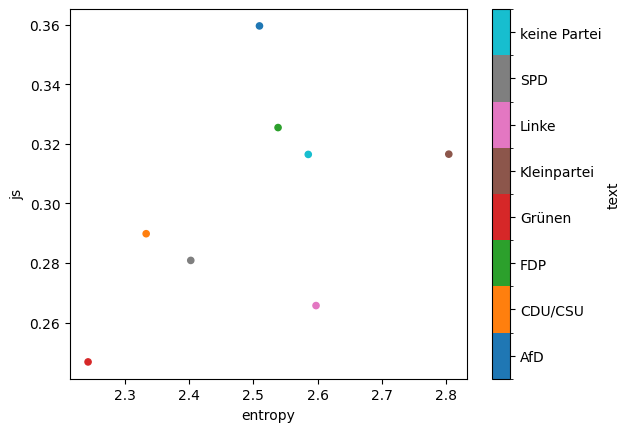

In [167]:
val='leaning_party'
a= entropy_JS_corr_data_ml2.query(f"social_group_category=='{val}'")#.plot.scatter(x='entropy',y='js',c='text')#[['js','entropy']]#.corr()#.iloc[1,0]
a.text=a.text.astype('category')
a.plot.scatter(x='entropy',y='js',c='text',cmap='tab10')

In [170]:
for val in entropy_JS_corr_data_mc2.social_group_category.unique():
    print('v',val)
    print(entropy_JS_corr_data_mc2.query(f"social_group_category=='{val}'")[['js','entropy']].corr())
    print('===')

v leaning_party
               js   entropy
js       1.000000  0.505901
entropy  0.505901  1.000000
===
v berufabschluss_clause
               js   entropy
js       1.000000 -0.113403
entropy -0.113403  1.000000
===
v schulabschluss_clause
               js   entropy
js       1.000000  0.781357
entropy  0.781357  1.000000
===
v gender
          js  entropy
js       1.0      1.0
entropy  1.0      1.0
===
v age_groups
               js   entropy
js       1.000000  0.591861
entropy  0.591861  1.000000
===
v ostwest
          js  entropy
js       1.0      1.0
entropy  1.0      1.0
===


In [91]:
leaning_party 0.49
berufabschluss_clause -0.16
schulabschluss_clause 0.73
age_groups 0.48


,js,entropy
js,1.000000,0.492239
entropy,0.492239,1.000000


In [92]:
entropy_JS_corr_data_mc2.query("social_group_category=='leaning_party'")[['js','entropy']].corr()

,js,entropy
js,1.000000,0.505901
entropy,0.505901,1.000000


In [93]:
entropy_JS_corr_data_mc2.query("social_group_category=='leaning_party'")[['js','entropy']].corr()

,js,entropy
js,1.000000,0.505901
entropy,0.505901,1.000000


In [14]:
a=population_level_entropy_results_mc2.pivot(index=['study'],columns=['source'],values=['shannon_entropy']).T
a=pd.concat([a, population_JS_mc2], axis=0)
a=a.T
print(a.columns)
a.columns=['entropy_llm','entropy_survey','js']
a['diff']=a['entropy_survey']-a['entropy_llm']
a['absdiff']=a['diff'].abs()
a.T.round(3).astype(str).to_latex('ex2_population_js_entropy_multiclass.txt')

Index([('shannon_entropy', 'llm'), ('shannon_entropy', 'survey'), 0], dtype='object')


In [15]:
a.corr()

,entropy_llm,entropy_survey,js,diff,absdiff
entropy_llm,1.000000,0.761724,-0.046086,-0.884844,-0.962597
entropy_survey,0.761724,1.000000,-0.350877,-0.372159,-0.638519
js,-0.046086,-0.350877,1.000000,-0.186283,0.051220
diff,-0.884844,-0.372159,-0.186283,1.000000,0.919854
absdiff,-0.962597,-0.638519,0.051220,0.919854,1.000000


<Axes: xlabel='entropy_survey', ylabel='js'>

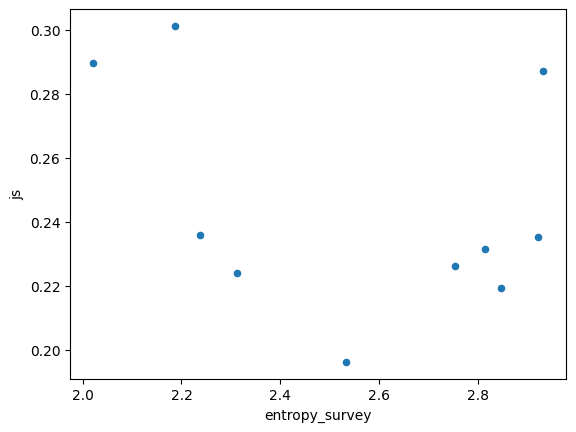

In [19]:
a.plot.scatter(x='entropy_survey',y='js')


<Axes: xlabel='entropy_llm', ylabel='js'>

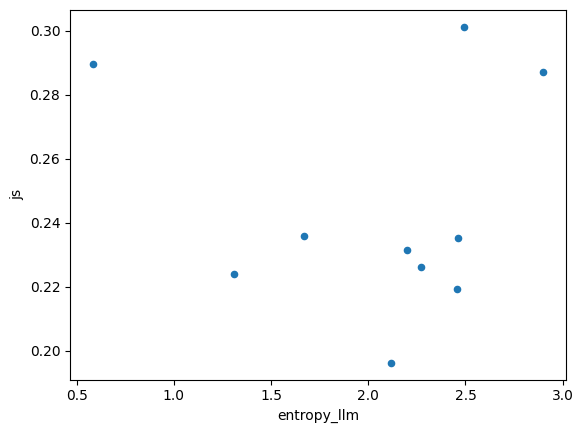

In [20]:
a.plot.scatter(x='entropy_llm',y='js')

In [105]:
a=population_level_entropy_results_ml2.pivot(index=['study'],columns=['source'],values=['shannon_entropy']).T
a=pd.concat([a, population_JS_ml2], axis=0)
a=a.T
a.columns=['entropy_llm','entropy_survey','js']
a['diff']=a['entropy_survey']-a['entropy_llm']
a['absdiff']=a['diff'].abs()
a.T.round(3).astype(str).to_latex('ex2_population_js_entropy_multilabel.txt')
a.corr()

,entropy_llm,entropy_survey,js,diff,absdiff
entropy_llm,1.000000,0.764405,0.086430,-0.678754,-0.790879
entropy_survey,0.764405,1.000000,-0.509515,-0.045371,-0.538726
js,0.086430,-0.509515,1.000000,-0.714264,-0.081844
diff,-0.678754,-0.045371,-0.714264,1.000000,0.611790
absdiff,-0.790879,-0.538726,-0.081844,0.611790,1.000000


In [ ]:
# #mi =get_MI_from_dataset( survey_labels_dict3['Llama2_all'] )
# #mi
# mi =get_MI_from_dataset( llm_labels_dict3['Llama2_all'] )
# mi =get_MI_from_dataset( llm_labels_dict3['1VAR_party'] )
population_JS1_multilabel, group_JS1_multilabel = get_JS_experiment(
    survey_population_df_multilabel1, llm_population_df_multilabel1, survey_group_pmf_multilabel1, llm_group_pmf_multilabel1
)

population_JS1_multiclass, group_JS1_multiclass = get_JS_experiment(
    survey_population_df_multiclass1, llm_population_df_multiclass1, survey_group_pmf_multiclass1, llm_group_pmf_multiclass1
)
group_JS1_multiclass["social_group"]=group_JS1_multiclass["social_group"].replace(shortened_dict)


group_JS1_multilabel["social_group"]=group_JS1_multilabel["social_group"].replace(shortened_dict)


population_JS1_multilabel['social_group_category']='population'
population_JS1_multilabel['social_group']='population'

population_JS1_multiclass['social_group_category']='population'
population_JS1_multiclass['social_group']='population'
ex1_JS_latex_ml=pd.concat([population_JS1_multilabel.set_index(['social_group_category','social_group']),group_JS1_multilabel.pivot(index=['social_group_category','social_group'],values='js',columns=['wave']) ])
ex1_JS_latex_ml.columns= ex1_JS_latex_ml.columns.map({'google-gemma-7b-it_12_1712704376_modified':'gemma', 'Llama2_all':'Llama2',
       'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173':'mixtral'})
ex1_JS_latex_ml=ex1_JS_latex_ml.round(3).astype(str)
ex1_JS_latex_ml.to_latex('ex1_JS_multilabel.txt',
        index=True,
        escape=False,
        sparsify=True,
        multirow=True,
        multicolumn=True,
        multicolumn_format='c',
        position='p',
        bold_rows=True
    )
ex1_JS_latex_mc=pd.concat([population_JS1_multiclass.set_index(['social_group_category','social_group']),group_JS1_multiclass.pivot(index=['social_group_category','social_group'],values='js',columns=['wave']) ])
ex1_JS_latex_mc.columns= ex1_JS_latex_mc.columns.map({'google-gemma-7b-it_12_1712704376_modified':'gemma', 'Llama2_all':'Llama2',
       'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173':'mixtral'})
ex1_JS_latex_mc=ex1_JS_latex_mc.round(3).astype(str)

ex1_JS_latex_mc.to_latex('ex1_JS_multiclass.txt',
        index=True,
        escape=False,
        sparsify=True,
        multirow=True,
        multicolumn=True,
        multicolumn_format='c',
        position='p',
        bold_rows=True
    )

In [166]:
def get_l(group_level_entropy_results,population_level_entropy_results,exp_to_filter=['1VAR_party','Llama2_base','Llama2_all'],var='leaning_party'):

    group_level_entropy_results['social_group_category']=group_level_entropy_results['social_group'].map(social_group_to_category)#.groupby('source')['entropy'].describe()#.query("study=='Llama2_all'")#.head()
    #group_level_entropy_results['weighted_entropy']=group_level_entropy_results['social_group'].map(d)* group_level_entropy_results['entropy']#.map(d)#.groupby('source')['entropy'].describe()#.query("study=='Llama2_all'")#.head()
    k=group_level_entropy_results[group_level_entropy_results['wave_id'].isin(exp_to_filter) & group_level_entropy_results['social_group_category'].isin([var]) ]


    pop_entropy=population_level_entropy_results#.pivot(index='study',values='shannon_entropy',columns='source').reset_index()
    #pop_entropy['social_group_category']='population'
    #pop_entropy['social_group']='population'
    pop_entropy=pop_entropy.rename({'study':'wave_id','shannon_entropy':'entropy_population'},axis=1)
    pop_entropy=pop_entropy[pop_entropy['wave_id'].isin(exp_to_filter) ]

    l= pd.merge(k,pop_entropy,on=['wave_id','source'],suffixes=('_sg','_pop')  )
    #row_mask= l[l['source']=='survey']
    return l 

import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def get_info_gain_plot(l,fname='entropy_info_gain.html'):
    # Create a subplot figure with 2 rows and 4 columns
    fig = make_subplots(
        rows=4, cols=3, 
        subplot_titles=l['social_group'].unique(),
        specs=[ [{"secondary_y": True}]*3, [{"secondary_y": True}]*3,[{"secondary_y": True}]*3,[{"secondary_y": True}]*3],
           horizontal_spacing=0.20,  # Increase horizontal spacing
        vertical_spacing=0.15  # Reduce vertical spacing
    )

    row = 1
    col = 1

    colors = px.colors.qualitative.Plotly  # You can choose any color sequence

    # Store seen wave_ids to avoid legend duplication
    seen_wave_ids = set()

    # Loop through each unique social group
    for i, k in enumerate(l['social_group'].unique()):
        df_long = l[l['social_group'] == k].melt(id_vars=['wave_id'], value_vars=['entropy', 'entropy_population'],
                                                 var_name='type', value_name='value')
        df_long['type'] = pd.Categorical(df_long['type'], categories=['entropy_population', 'entropy'], ordered=True)
        df_long = df_long.sort_values('type')

        # Create line plots for each type of entropy
        for j, wave_id in enumerate(df_long['wave_id'].unique()):
            df_wave = df_long[df_long['wave_id'] == wave_id]

            # Assign a consistent color for both lines and markers
            color = colors[j % len(colors)]  # Cycle through the color palette

            # Add primary y-axis trace for 'entropy_population' type
            fig.add_trace(
                go.Scatter(
                    x=df_wave['type'], 
                    y=df_wave['value'], 
                    mode='lines+markers', 
                    name=f'{wave_id} - Entropy', 
                    line=dict(color=color),
                    marker=dict(color=color),
                    legendgroup=f'Wave {wave_id}',
                    showlegend=(wave_id not in seen_wave_ids)  # Show legend only once for each wave_id
                ),
                row=row, col=col, secondary_y=False
            )

            # Add secondary y-axis trace for 'entropy' type
            fig.add_trace(
                go.Scatter(
                    x=df_wave['type'], 
                    y=df_wave['value'], 
                    mode='lines+markers', 
                    name=f'{wave_id} - Entropy', 
                    line=dict(dash='dash', color=color),
                    marker=dict(color=color),
                    legendgroup=f'{wave_id}',
                    showlegend=False  # Hide legend for this entry
                ),
                row=row, col=col, secondary_y=True
            )

            # Mark the wave_id as seen
            seen_wave_ids.add(wave_id)

        # Update row and column for next subplot
        col += 1
        if col > 3:
            col = 1
            row += 1

    fig.update_layout(
        height=1000, width=1200, 
        legend_title_text='Model', 
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=-0.4,  # Adjust this value to move the legend closer to the plot
            xanchor='center',
            x=0.5,
            itemsizing='constant'  # Ensures consistent item sizing in the legend
        ),
    )

    # Update axis labels for all subplots
    for i in range(1, len(l['social_group'].unique()) ):  # Assuming there are 8 subplots
        fig.update_xaxes(title_text="Type", row=(i-1)//3+1, col=(i-1)%3+1)
        fig.update_yaxes(title_text="Pop. Entropy", row=(i-1)//3+1, col=(i-1)%3+1)
        fig.update_yaxes(title_text="Subpop. Entropy", secondary_y=True, row=(i-1)//3+1, col=(i-1)%3+1)

    # Save the plot to an HTML file
    fig.write_html(fname)

In [167]:
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial import distance

def get_survey_to_survey_JS_distances(survey_population_df, fname='s2s_JS_dist.html'):
    rs = []
    
    for wave_id in [17, 18, 19, 20, 21]:
        for col in survey_population_df.columns:
            if col <= wave_id:
                js = distance.jensenshannon(survey_population_df[col], survey_population_df[wave_id])
                r = {
                    'd1': col,
                    'd2': wave_id,
                    'js': js
                }
                rs.append(r)
    
    df = pd.DataFrame(rs)

    df['text'] = "wave " + df['d1'].astype(str) + "<br>" + df['d1'].map(wave_dates)
    df['d2'] = df['d2'].astype(str)
    
    fig = go.Figure()

    # Add a trace for each category in d2
    for category in df['d2'].unique():
        category_df = df[df['d2'] == category]
        fig.add_trace(go.Scatter(
            x=category_df['d1'],
            y=category_df['js'],
            mode='lines+markers',
            name=str(category),
            text=category_df['text'],
        ))

    # Update layout
    fig.update_layout(
        xaxis_title='Wave - Date',
        yaxis_title='JS',
        xaxis_tickvals=df['d1'],
        xaxis_ticktext=df['text'],
        yaxis=dict(
            tickmode='linear',
            tick0=0,
            dtick=0.05,
            showgrid=True,
            gridcolor='rgba(128, 128, 128, 0.5)',
            gridwidth=1,
            griddash='dash',  # Make the grid lines dashed
            zeroline=True,
            zerolinecolor='rgba(128, 128, 128, 0.5)',
            zerolinewidth=1,
        ),
        plot_bgcolor='white',
        legend_font=dict(size=20),
        font=dict(size=20),
    )

    # Save to HTML
    fig.write_html(fname)
    return fig
#get_survey_to_survey_JS_distances(survey_population_df_multilabel2,fname='ex2_s2s_JS_dist_multilabel.html')

In [168]:
population_level_entropy_results1_multilabel, group_level_entropy_results1_multilabel = (
    get_experiment_entropy(
        survey_population_df_multilabel1, llm_population_df_multilabel1, survey_group_pmf_multilabel1, llm_group_pmf_multilabel1
    )
)

population_level_entropy_results1_multiclass, group_level_entropy_results1_multiclass = (
    get_experiment_entropy(
        survey_population_df_multiclass1, llm_population_df_multiclass1, survey_group_pmf_multiclass1, llm_group_pmf_multiclass1
    )
)

l = get_l(group_level_entropy_results1_multilabel,population_level_entropy_results1_multilabel,   exp_to_filter=['mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173','Llama2_all','Llama3_70B_all'])
l.loc[l['source']=='survey','wave_id']='survey'
l=l.drop_duplicates(subset=['wave_id','social_group','source'])
l.wave_id=l.wave_id.map({'survey':'survey','Llama2_all':'Llama2',
       'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173':'Mixtral'})
#get_info_gain_plot(l)

In [169]:
# from src.analysis.metrics import  get_entropy_JS_corr_data,get_cramerV, get_cramerV_multiclass, get_population_level_ape_results

# ape_results1= get_population_level_ape_results(survey_population_df_multilabel3,llm_population_df_multilabel3,survey_group_pmf_multilabel3,llm_group_pmf_multilabel3,save=True,experiment_type='ablationExperiment',file_name='ape_results_multilabel.csv')
# ape_results2= get_population_level_ape_results(survey_population_df_multiclass3,llm_population_df_multiclass3,survey_group_pmf_multiclass3,llm_group_pmf_multiclass3,save=True,experiment_type='ablationExperiment',file_name='ape_results_multilabel.csv')


In [170]:
df= (llm_population_df_multiclass3- survey_population_df_multiclass3)*100 #.sum()*100
df['1VAR']= df.filter(like='1VAR').min(axis=1)
df['without']= df.filter(like='without_').min(axis=1)
df=df[['Llama2_base','1VAR','without','Llama2_all']].round(2)
mask= df.abs().eq( (df.abs().min(axis=1)) ,axis=0)
df.applymap( lambda x :  f"\\textbf{{{round(x,2)}}}").where(mask,df).astype(str).to_latex('ex3_PE_by_category.txt')

In [174]:
population_level_entropy_results3_multilabel, group_level_entropy_results3_multilabel = (
    get_experiment_entropy(
        survey_population_df_multilabel3, llm_population_df_multilabel3, survey_group_pmf_multilabel3, llm_group_pmf_multilabel3
    )
)

population_level_entropy_results3_multiclass, group_level_entropy_results3_multiclass = (
    get_experiment_entropy(
        survey_population_df_multilabel3, llm_population_df_multilabel3, survey_group_pmf_multilabel3, llm_group_pmf_multilabel3
    )
)

l = get_l(group_level_entropy_results3_multilabel,population_level_entropy_results3_multilabel,   exp_to_filter=['1VAR_age','Llama2_base','Llama2_all'], var='age_groups')

l.loc[l['source']=='survey','wave_id']='survey'
l=l.drop_duplicates(subset=['wave_id','social_group','source'])

# l.wave_id=l.wave_id.replace({'survey':'survey','Llama2_all':'Llama2',
#        'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173':'Mixtral'})
get_info_gain_plot(l,'ex3_age.html')

In [172]:
group_level_entropy_results3_multilabel.social_group_category.unique()

array(['ostwest', 'berufabschluss_clause', 'leaning_party', 'gender',
       'schulabschluss_clause', 'age_groups'], dtype=object)

In [145]:
group_level_entropy_results3_multilabel.wave_id.unique()

array(['1VAR_age', '1VAR_berufabschluss', '1VAR_eastwest', '1VAR_gender',
       '1VAR_party', '1VAR_schulabschluss', 'Llama2_all', 'Llama2_base',
       'without_age', 'without_berufabschluss', 'without_eastwest',
       'without_gender', 'without_party', 'without_schulabschluss'],
      dtype=object)

In [ ]:
# a=group_level_entropy_results.pivot(index=['wave_id','social_group'],values='entropy',columns=['source']).reset_index()
# a['social_group_category']=a['social_group'].map(social_group_to_category)
# a.query("social_group_category=='leaning_party'").head(50)

In [ ]:
group_level_entropy_results3_multilabel.social_group_category.unique()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
d_list=[]
for k in survey_labels_dict2.keys():
    df= survey_labels_dict2[k].filter(regex='gender|^age_groups$|clause|party|ostwest|eastwest|highest_prob_label')
    df=sample_random_label_from_strata(df)
    
    d= {'wave':k,
     'acc_survey':accuracy_score(df['highest_prob_label'], df['new_sampled_label']),
     'kappa_survey':cohen_kappa_score(df['highest_prob_label'], df['new_sampled_label'])
    }
    
    df= llm_labels_dict2[k].filter(regex='gender|^age_groups$|clause|party|ostwest|eastwest|highest_prob_label|highest_prob_label_llm')
    #df=sample_random_label_from_strata(df)
    d.update(
    {
    'acc_llm': accuracy_score(df['highest_prob_label'], df['highest_prob_label_llm']),
    'kappa_llm':cohen_kappa_score(df['highest_prob_label'], df['highest_prob_label_llm'])
    }
    )
    d_list.append(d)
    print('==================')

In [ ]:
df=pd.DataFrame(d_list)
df.set_index('wave', inplace=True)
df=df.T
df.round(2).astype(str).to_latex('a.txt')#.to_csv('sampledSurvey_and_llm_acc_kappa_scores.csv')

In [ ]:
def get_labels_percentage_table(survey_population_df_multilabel2,llm_population_df_multilabel2):

    def color_cell(value, threshold=0):
        value=float(value)
        if value > 1:
            color = 'ForestGreen'
            return f"\\textcolor{{{color}}}{{value}}"
        elif value < -1 :
            color='red'
            return f"\\textcolor{{{color}}}{{value}}"
        else:
            color='black'
            return f"\\textcolor{{{color}}}{{value}}"


    a= survey_population_df_multilabel2.multiply(100).round(1)#.astype(str)
    b= llm_population_df_multilabel2.multiply(100).round(1)#.astype(str)
    colordf=(b-a).applymap(color_cell)
    for col in colordf.columns:
        colordf[col]=colordf[col].combine(b[col],lambda fmt,value: fmt.replace('value',str(value)))
    b=colordf#.combine(b[12],lambda fmt,value: fmt.format(value))
    
    a['src']='survey'
    b['src']='llm'
    a=a.astype(str)
    b.loc[:,'mean APE']= ( llm_population_df_multilabel2-survey_population_df_multilabel2).divide(survey_population_df_multilabel2).multiply(100).abs().mean(axis=1).round(2).astype(str)
    #b.loc[:,'mean PE']= ( llm_population_df_multilabel2-survey_population_df_multilabel2).divide(survey_population_df_multilabel2).multiply(100).mean(axis=1)

    c=pd.concat([a.set_index([a.index,'src']),b.set_index([b.index,'src'])]).sort_index()
    c['mean APE']= c['mean APE'].fillna('')
    #c['mean PE']= c['mean PE'].fillna('')

    c.loc['APE',:]=np.append(( llm_population_df_multilabel2-survey_population_df_multilabel2).round(2).multiply(100).abs().sum(axis=0).values , [''])
    return c #c#.to_latex('a.txt')
a=get_labels_percentage_table(survey_population_df_multilabel1.drop('Llama3_70B_all',axis=1),llm_population_df_multilabel1.drop('Llama3_70B_all',axis=1) )
a.to_latex('bb.txt')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

for k in llm_labels_dict2.keys():
    df= llm_labels_dict2[k].filter(regex='gender|^age_groups$|clause|party|ostwest|eastwest|highest_prob_label')
    print(k,accuracy_score(df['highest_prob_label'], df['highest_prob_label_llm']))
    print(k,cohen_kappa_score(df['highest_prob_label'], df['highest_prob_label_llm']))
    print('==================')

In [ ]:
import re
def is_about_covid(text):
    pattern = r'\b(covid|corona|coronavirus|covid[-\s]?19|sars[-\s]?cov[-\s]?2)\b'
    return re.search(pattern, text, re.IGNORECASE) is not None
# for k in llm_labels_dict1.keys():
#     survey_labels_dict1[k]['text_covid']=survey_labels_dict1[k]['text'].apply(is_about_covid)#.value_counts(1)
#     print(survey_labels_dict1[k]['text_covid'].value_counts(1))
for k in llm_labels_dict1.keys():
    llm_labels_dict1[k]['text_covid']=llm_labels_dict1[k]['text_llm'].apply(is_about_covid)#.value_counts(1)
    print(k,a)

In [ ]:
for k in llm_labels_dict1.keys():
    print(k,llm_labels_dict1[k]['text_llm'].sample(30).values,'\n')

#introductory sentence percentages
for k in llm_labels_dict1.keys():
    #print(k,llm_labels_dict1[k]['text_llm'].sample(10).values,'\n')
    if 'gemma' in k:
        print(k,llm_labels_dict1[k]['text_llm'].str[:3].value_counts(1),'\n')
        print(k,llm_labels_dict1[k]['text_llm'].str.startswith('Als Deutschin mit deutscher Staatsbürgerschaft').value_counts(1),'\n')
    elif 'Llama' in k:
        print(k,llm_labels_dict1[k]['text_llm'].str[:10].value_counts(1),'\n')
        print(k,llm_labels_dict1[k]['text_llm'].str.startswith('Das wichtigste Problem').value_counts(1),'\n')
    elif 'mistralai' in k :
        print(k,llm_labels_dict1[k]['text_llm'].str[:10].value_counts(1),'\n')
        print(k,llm_labels_dict1[k]['text_llm'].str.startswith('Eines der wichtigsten Probleme').value_counts(1),'\n')


In [ ]:
from src.analysis.ablationExperiment.plot import get_ablation_JS_plot
from src.analysis.experiment_utils import get_JS_experiment, get_experiment_entropy
from src.analysis.metrics import get_cramerV, get_population_level_ape_results,get_cramerV_multiclass,get_population_level_ape_results
from src.analysis.modelExperiment.plot import get_modelExperiment_pmf_comparison
from src.analysis.modelExperiment.utils import get_modelExperiment_data, get_textual_stats
from src.analysis.data_processing import labels_16
population_JS, group_JS = get_JS_experiment(
    survey_population_df_multilabel1, llm_population_df_multilabel1, survey_group_pmf_multilabel1, llm_group_pmf_multilabel1
)
population_level_entropy_results, group_level_entropy_results = (
    get_experiment_entropy(
        survey_population_df_multilabel1, llm_population_df_multilabel1, survey_group_pmf_multilabel1, llm_group_pmf_multilabel1
    )
)


js_population_fig= get_ablation_JS_plot(population_JS,save=True,fname='js_population_fig_multilabel.html')
js_population_fig.write_html('js_population_fig_multilabel.html')

population_JS.to_csv('population_JS_multilabel.csv')
population_level_entropy_results.to_csv('population_level_entropy_results_multilabel.csv')
population_JS, group_JS = get_JS_experiment(
    survey_population_df_multiclass1, llm_population_df_multiclass1, survey_group_pmf_multiclass1, llm_group_pmf_multiclass1
)
population_JS.to_csv('population_JS_multiclass.csv')

    

In [ ]:
def concat_colnames_nonzero(row):
    return '_'.join([col for col in row.index if row[col] != 0])


In [ ]:
def get_textual_stats(llm_labels_dict1,survey_labels_dict1):
    d={}
    llm_labels_dict1['survey'] = survey_labels_dict1[list(survey_labels_dict1.keys())[0]] #any key from survey_labels_dict1 will work, they are repeetitions just to match llm_labels_dict

    for k,df in llm_labels_dict1.items():
        avg_label_cnt=df[labels_16].sum(axis=1).mean()
        avg_sample_per_label= df[labels_16].sum(axis=0).mean()
        if k =='survey':
            avg_word_count=df['text'].apply(lambda x: len(x.split())).mean()
        else:
            avg_word_count=df['text_llm'].apply(lambda x: len(x.split())).mean()
        labels_concatted= df[labels_16].apply(concat_colnames_nonzero,axis=1)
        labels_concatted= labels_concatted[labels_concatted.str.contains("_")]
        lbl_vc= labels_concatted.value_counts(1).head(5)
        d[k]={
            'avg_label_cnt':avg_label_cnt,
            'avg_sample_per_label':avg_sample_per_label,
            'avg_word_count':avg_word_count,
        }
    df= pd.DataFrame(d).round(2)#.to_csv()
    return df 
get_textual_stats(llm_labels_dict1,survey_labels_dict1).to_csv('textual_stats.csv')

In [ ]:
# def get_modelExperiment_pmf_comparison(llm_population_df,survey_population_df,fname='pmf_comparison_1.html',save=False):
#     df = llm_population_df.copy()
#     df['wave 12']=survey_population_df.iloc[:,0]
#     df.columns=['gemma-7b-it', 'lama-2-13b-chat-hf',
#            'mistralai-Mixtral-8x7B-Instruct', 'wave 12']
#     df= df.apply(lambda x: (x*100).round(1) ) #['wave 12']
#     coarse_translation = {
#         "Politische Strukturen und Prozesse": "Political System <br> and Processes",
#         "Sozialpolitik": "Social <br> Policy",
#         "Gesundheitspolitik": "Health <br> Policy",
#         "Familien- und Gleichstellungspolitik": "Family and <br> Gender Equality <br> Policy",
#         "Bildungspolitik": "Education <br> Policy",
#         "Umweltpolitik": "Environmental <br> Policy",
#         "Wirtschaftspolitik": "Economic <br> Policy",
#         "Sicherheits": "Security",
#         "Außenpolitik": "Foreign <br> Policy",
#         "Medien und Kommunikation": "Media and <br> Communication",
#         "Sonstiges": "Others",
#         "Migration und Integration": "Migration and <br> Integration",
#         "Ostdeutschland": "East <br> Germany",
#         "keine Angabe": "Not <br> specified",
#         "weiß nich": "Do not know",
#         "LLM refusal": "LLM refusal",
#         "Werte, politische Kultur und Gesellschaftskritik": "Values,<br> political culture<br> and general <br> social criticism"
#     }

#     df.index=df.index.map(coarse_translation)
#     import plotly.graph_objects as go

#     def plot_comparison_chart(llm_population_df, title, output_file_path, save=False, width=1):
#         figs = []
#         for col in llm_population_df.columns:
#             data = llm_population_df[col]
#             figs.append(go.Bar(
#                 x=data.index, 
#                 y=data.values, 
#                 name=col,
#                 width=width,
#                  text=data.values,         
#                 textposition='outside', )
#             )

#         # Combine the traces in a single figure
#         fig = go.Figure(data=figs)

#         fig.update_layout(
#             title=title,
#             yaxis_title='Percentage',
#             barmode='group',  
#             bargap=0.30,  
#             bargroupgap=0.35,  
#             legend=dict(
#                 orientation='h',
#                 yanchor='bottom',
#                 y=1.02,
#                 xanchor='right',
#                 x=1,
#             ),     
#             font=dict(size=15),
#             plot_bgcolor='rgba(0, 0, 0, 0)',
#         )

#         def split_label(label):
#             if isinstance(label, str) and len(label) > 10:
#                 middle = len(label) // 2
#                 space_pos = label.rfind(' ', 0, middle)
#                 comma_pos = label.rfind(',', 0, middle)

#                 split_pos = max(space_pos, comma_pos) if max(space_pos, comma_pos) != -1 else middle

#                 return f"{label[:split_pos+1]}<br>{label[split_pos+1:]}"
#             return label

#         tickvals = llm_population_df.index
#         ticktext = [split_label(x) for x in tickvals]

#         # Generate positions for separator lines based on the index of categorical values
#         separator_positions = [i + 0.5 for i in range(len(tickvals) - 1)]

#         fig.update_xaxes(
#             ticktext=ticktext,
#             tickvals=tickvals,
#             tickfont=dict(color='black'),
#             tickangle=0,  # Set tick angle to 0 to make text horizontal
#             showgrid=False,
#             ticks='outside',
#             ticklen=10,  # Length of the ticks
#             tickwidth=2,  # Width of the ticks
#             tickcolor='white'
#         )

#         fig.update_yaxes(tickfont=dict(color='black'))

#         # Add separator lines using shapes
#         shapes = []
#         for pos in separator_positions:
#             shapes.append(dict(
#                 type='line',
#                 x0=pos,
#                 x1=pos,
#                 y0=0,
#                 y1=-0.025,
#                 xref='x',
#                 yref='paper',
#                 line=dict(color='black', width=2)
#             ))

#         fig.update_layout(shapes=shapes)

#         if save and output_file_path.endswith(".html"):    
#             # Save the figure as an HTML file
#             fig.write_html(output_file_path)
#         elif save and output_file_path.endswith(".png"):
#             fig.write_image(output_file_path)
#         else:
#             fig.write_image(output_file_path, engine="kaleido")

#         return fig
#     fig=plot_comparison_chart(llm_population_df=df, title = "", output_file_path= 'pmf_comparison_1.html', save=True, width=0.2)
#     return fig
# get_modelExperiment_pmf_comparison(survey_population_df=survey_population_df_multilabel1,llm_population_df= llm_population_df_multilabel1, fname= 'pmf_comparison_1.html', save=True)


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# import numpy as np
# import itertools
# # Assuming df_train is your DataFrame containing the training data

# # Splitting the data
# X_train = df_train.drop(columns=['highest_prob_label'])
# Y_train = df_train['highest_prob_label'].values

# X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# # Encoding the target variable Y_train
# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)

# # Define a function to convert encoded labels back to original values
# def decode_label(encoded_labels):
#     return le.inverse_transform(encoded_labels)

# # Initializing XGBClassifier
# #clf = XGBClassifier(tree_method="hist", enable_categorical=True)


# vc=(1/pd.Series(y_train_encoded).value_counts(1)) 
# dict(zip(vc.keys(),vc.values))

# clf = XGBClassifier(tree_method="hist", enable_categorical=True, scale_pos_weight=class_weights)



# # Training the classifier
# clf.fit(X_train, y_train_encoded)

# # Predicting on validation set
# y_val_pred_encoded = clf.predict(X_val)

# # Decoding predicted labels back to original values
# y_val_pred = decode_label(y_val_pred_encoded)

# # Print accuracy and classification report
# print("Accuracy on validation set:", accuracy_score(y_val, y_val_pred))
# print("Classification report:")
# print(classification_report(y_val, y_val_pred))

# # Compute confusion matrix
# conf_mat = confusion_matrix(y_val, y_val_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# tick_marks = np.arange(len(le.classes_))
# plt.xticks(tick_marks, le.classes_, rotation=45)
# plt.yticks(tick_marks, le.classes_)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# # Print numbers inside the plot
# thresh = conf_mat.max() / 2.
# for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
#     plt.text(j, i, format(conf_mat[i, j], 'd'),
#              horizontalalignment="center",
#              color="white" if conf_mat[i, j] > thresh else "black")

# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, accuracy_score
# import lightgbm as lgb

# # Assuming df_train and df_test are already defined and preprocessed

# # Separate features and labels
# X_train = df_train.drop(columns=['highest_prob_label'])
# Y_train = df_train['highest_prob_label']

# # Ensure the test set is correctly assigned
# X_test = df_test.drop(columns=['highest_prob_label'])
# Y_test = df_test['highest_prob_label']

# # Encode target labels if they are categorical
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(Y_train)
# y_test = label_encoder.transform(Y_test)

# # Train-test split
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# # Initialize LightGBM classifier
# clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', n_jobs=-1, random_state=42,class_weight ='balanced')

# # Fit the classifier
# clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# # Predict and evaluate on validation set
# y_val_pred = clf.predict(X_val)
# print(classification_report(y_val, y_val_pred))
# print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")

# # Predict and evaluate on test set
# y_test_pred = clf.predict(X_test)
# print(classification_report(y_test, y_test_pred))
# print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# import statsmodels.api as sm

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# df=df.sample(frac=0.2)
# #df=survey_labels_dict[12].filter(regex='gender|^age_groups$|clause|party|ostwest|eastwest|highest_prob_label')
# X = df[['ostwest', 'leaning_party', 'gender','age_groups','schulabschluss_clause','berufabschluss_clause']]
# preds=[]
# Y = df['highest_prob_label'].values.reshape(-1, 1)


# # One-hot encoding for categorical variables
# encoder = OneHotEncoder(drop='first',sparse_output=False)
# encodery = OneHotEncoder(drop='first',sparse_output=False)

# X_encoded = encoder.fit_transform(X)
# y_encoded = encodery.fit_transform(Y)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# #exog = sm.add_constant(X_train)
# X_train_exog = sm.add_constant(X_train)

# model = sm.MNLogit(y_train, X_train_exog)
# result = model.fit_regularized()

# print(result.summary())


In [ ]:
# X_encoded_exog = sm.add_constant(X_encoded)
# res=result.predict(X_encoded_exog)#>0.5
# p=pd.Series(np.argmax(res,axis=1)).value_counts(1).sort_index()
# q=pd.Series(np.argmax(y_encoded,axis=1)).value_counts(1).sort_index()
# from scipy.spatial import distance
# distance.jensenshannon(p,q)


In [ ]:
#naive bayes classifier 
import numpy as np
rng = np.random.RandomState(1)
df=survey_labels_dict[16].filter(regex='gender|^age_groups$|clause|party|ostwest|eastwest|highest_prob_label')

#df=survey_labels_dict[12].filter(regex='gender|^age_groups$|clause|party|ostwest|eastwest|highest_prob_label')
X = df[['ostwest', 'leaning_party', 'gender','age_groups','schulabschluss_clause','berufabschluss_clause']]
preds=[]
Y = df['highest_prob_label'].values.reshape(-1, 1)


# One-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first',sparse_output=False)



X_encoded = encoder.fit_transform(X)
y_encoded = encodery.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
res= clf.predict(X_test)
q=pd.Series( df['highest_prob_label']).value_counts(1)
p=pd.Series(res).value_counts(1).reindex(q.index).fillna(0)
distance.jensenshannon(p,q)

In [ ]:
res=result.predict(X_encoded_exog)#>0.5
p=pd.Series(np.argmax(res,axis=1)).value_counts(1).sort_index()
q=pd.Series(np.argmax(y_encoded,axis=1)).value_counts(1).sort_index()
from scipy.spatial import distance


In [ ]:
res=result.predict(X_encoded_exog)#>0.5
p=pd.Series(np.argmax(res,axis=1)).value_counts(1).sort_index()
q=pd.Series(np.argmax(y_encoded,axis=1)).value_counts(1).sort_index()
from scipy.spatial import distance
distance.jensenshannon(p,q)

In [ ]:
# Turn off scientific notation in Pandas and Numpy
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [ ]:
from scipy.stats import entropy
entropy(p,q,base=2)

In [ ]:
X_exog = sm.add_constant(X_encoded)
preds_label= model.predict(X_exog).tolist()
preds.append(preds_label)
#poisson_model.predict(X_test)
print('===========================================')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df[['ostwest', 'leaning_party', 'gender', 'age_groups']]
preds=[]
for lbl in labels_16:
    Y = df[lbl].values


    # One-hot encoding for categorical variables
    encoder = OneHotEncoder(drop='first',sparse_output=False)
    X_encoded = encoder.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

    exog = sm.add_constant(X_train)

    # Fit a Poisson regression model
    poisson_model = sm.GLM(y_train, exog, family=sm.families.NegativeBinomial()).fit()
    print('label',lbl)
    # Summary of the model
    #print(poisson_model.summary())
    X_exog = sm.add_constant(X_encoded)
    preds_label= poisson_model.predict(X_exog).tolist()
    preds.append(preds_label)
    #poisson_model.predict(X_test)
    print('===========================================')



In [ ]:
df[labels_16].sum().reset_index()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:

# Predict and evaluate the model
y_pred = poisson_model.predict(X_test)

# For evaluation, you can calculate metrics like Mean Squared Error (MSE) or compare the predicted counts with actual counts.
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,

In [ ]:
X_encoded

In [ ]:
from src.analysis.waveExperiment.utils import get_JS_waveExperiment


population_JS, group_JS = get_JS_waveExperiment(
    survey_population_df, llm_population_df, survey_group_pmf, llm_group_pmf
)

In [ ]:
from src.data.process_data import process_open_ended, process_wave_data,process_open_ended_new
wave_dates=[]
for i in range(10,22):
    wave_number=i
    wave_df, wave_open_ended_df, df_coding_840s = load_raw_survey_data(wave_number)
    field_end=wave_df.field_end.unique()
    print(field_end)
    wave_dates.append(field_end[0])
#wave_open_ended_df = process_open_ended_new(wave_open_ended_df, df_coding_840s, wave_number)

In [ ]:
wave_dates

In [ ]:
df_coding_840s.filter(regex=f'kp{13}_840_c1', axis=1).kp13_840_c1.value_counts(1,dropna=True).head(60)#.kp12_840s.value_counts(dropna=False)

In [ ]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.ENGLISH,  Language.GERMAN]

detector = LanguageDetectorBuilder.from_languages(*languages).build()
def get_langs(text):
    det_langs=[]
    for result in detector.detect_multiple_languages_of(text):
        #print(f"{result.language.name}: '{sentence[result.start_index:result.end_index]}'")
        det_langs.append(result.language.name)
    return '_'.join(sorted(list(set(det_langs))))

In [ ]:
llm_labels_dict['Llama2_all']#['text_llm_lang'].value_counts()

In [ ]:
df= llm_labels_dict['Llama2_all'][['text_llm','text_llm_lang']]

In [ ]:
df.text_llm_lang.value_counts(1)

In [ ]:
df.query("text_llm_lang=='ENGLISH_GERMAN'").text_llm.values

In [ ]:
pip install lingua-language-detector

In [ ]:
from src.analysis.metrics import (
    calculate_cramerV,
    calculate_group_entropy,
    calculate_pmf_by_groups,
    calculate_pmf_population,
    calculate_population_entropy,
    get_MI_from_dataset,
    calculate_cramerV_multiclass,
    get_js_dist_by_groups,
    get_js_dist_population,
)

In [ ]:
get_js_dist_population(survey_population_df,llm_population_df)

In [ ]:
def get_js_dist_population(df1,df2):
    if type(df1)==pd.DataFrame:
        assert (df1.columns==df2.columns).all()
    
        js_arr=distance.jensenshannon(df1,df2).tolist()
        df= pd.DataFrame([js_arr],columns=df1.columns)
    return  df

In [ ]:
from scipy.stats import entropy

survey_population_df2=survey_population_df[~survey_population_df.index.str.contains('keine Angabe|weiß nich|Medien und Kommunikation')]
llm_population_df2=llm_population_df[~llm_population_df.index.str.contains('keine Angabe|weiß nich|Medien und Kommunikation')]

entropy(survey_population_df2,llm_population_df2,base=2)

In [ ]:
llm_population_df

In [ ]:
from src.bert.utils import get_experiment_df
from src.paths import RESULTS_DIR
from tqdm import tqdm

classid2trainid = {int(classname):idx  for idx, classname in enumerate(sorted(pd.read_csv(os.path.join(CODING_DIR,'map.csv')).upperclass_id.unique())) }
df_lookup= pd.read_csv(os.path.join(CODING_DIR,'map.csv'))
label2str= dict(zip(df_lookup.upperclass_id,df_lookup.upperclass_name))
label_names= [label2str[i] for i in range(0,len(label2str)) ]
labels_16= [label_name for label_name in label_names if label_name!='LLM refusal']

In [15]:
from src.bert.utils import get_experiment_df
from src.paths import RESULTS_DIR
from tqdm import tqdm

classid2trainid = {int(classname):idx  for idx, classname in enumerate(sorted(pd.read_csv(os.path.join(CODING_DIR,'map.csv')).upperclass_id.unique())) }
df_lookup= pd.read_csv(os.path.join(CODING_DIR,'map.csv'))
label2str= dict(zip(df_lookup.upperclass_id,df_lookup.upperclass_name))
label_names= [label2str[i] for i in range(0,len(label2str)) ]
labels_16= [label_name for label_name in label_names if label_name!='LLM refusal']
ablation_experiments= ['1VAR_age',
 '1VAR_berufabschluss',
 '1VAR_eastwest',
 '1VAR_gender',
 '1VAR_party',
 '1VAR_schulabschluss',
 'Llama2_all',
 'Llama2_base',
 'without_age',
 'without_berufabschluss',
 'without_eastwest',
 'without_gender',
 'without_party',
 'without_schulabschluss']


model_comparison_experiments= [
 'google-gemma-7b-it_12_1712704376_modified',
 'Llama2_all',
 'mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173'
]

wave_experiments= ['12/Llama2_all',
 '13/Llama2_all',
 '14/Llama2_all',
 '15/Llama2_all',
 '16/Llama2_all',
 '17/Llama2_all',
 '18/Llama2_all',
 '19/Llama2_all',
 '20/Llama2_all',
 '21/Llama2_all']

social_groups=[ 'ostwest','berufabschluss_clause', 'leaning_party', 'gender','schulabschluss_clause', 'age_groups']

social_category_to_group={'ostwest': ['Westdeutschland', 'Ostdeutschland'],
 'berufabschluss_clause': ['hat einen Berufsfachschulabschluss.',
  'hat einen Fachhochschulabschluss.',
  'hat einen Universitätsabschluss.',
  'hat eine kaufmännische Lehre abgeschlossen.',
  'hat einen Meisterabschluss oder Technikerabschluss.',
  'hat eine Lehre abgeschlossen.',
  'hat keine berufliche Ausbildung abgeschlossen.',
  'hat einen Fachschulabschluss.',
  'befindet sich noch in beruflicher Ausbildung.',
  'hat ein Berufliches Praktikum oder Volontariat abgeschlossen.',
  'hat eine gewerbliche oder landwirtschaftliche Lehre abgeschlossen.'],
 'leaning_party': ['die Grünen',
  'Die Linke',
  'die CDU/CSU',
  'die FDP',
  'die SPD',
  'die AfD',
  'keine Partei',
  'eine Kleinpartei'],
 'gender': ['weiblich', 'männlich'],
 'schulabschluss_clause': ['hat einen Fachhochschulreife',
  'hat das Abitur',
  'hat einen Realschulabschluss',
  'hat einen Hauptschulabschluss',
  'hat keinen Schulabschluss',
  'ist noch Schüler/in'],
 'age_groups': ['45-59 YEARS', '60 and more', '30-44 YEARS', '18-29 YEARS']}
social_group_to_category = {v: k for k, vals in social_category_to_group.items() for v in vals}
wave_dates={
10: '06-11-2018',
11: '28-05-2019',
12: '05-11-2019',
 13: '21-04-2020',
 14: '03-11-2020',
 15: '25-02-2021',
 16: '06-05-2021',
 17: '07-07-2021',
 18: '11-08-2021',
 19: '15-09-2021',
 20: '29-09-2021',
 21: '09-12-2021'}

# from src.analysis.waveExperiment.utils import get_waveExperiment_data 
# import time 
# begin=time.time()
# (
#         survey_labels_dict,
#         llm_labels_dict,
#         # multilabel
#         survey_population_df_multilabel,  # df
#         llm_population_df_multilabel,  # df
#         survey_group_pmf_multilabel,  # dict of dfs
#         llm_group_pmf_multilabel,  # dict of dfs
#         # multiclass
#         survey_population_df_multiclass,  # df
#         llm_population_df_multiclass,  # df
#         survey_group_pmf_multiclass,  # dict of dfs
#         llm_group_pmf_multiclass,  # dict of dfs
#     ) = get_waveExperiment_data(until=16)
# end=time.time()
# print(end-begin)

# MI_results_waveExperiment= get_MI_experiment(survey_labels_dict,llm_labels_dict)
# population_JS,group_JS= get_JS_waveExperiment(survey_population_df,llm_population_df,survey_group_pmf,llm_group_pmf)
# population_level_entropy_results,group_level_entropy_results = get_waveExperiment_Entropy(survey_population_df,llm_population_df,survey_group_pmf,llm_group_pmf)
# cramer_results=get_cramerV_waveExperiment(survey_labels_dict,llm_labels_dict)
# cramer_results2=get_cramerV_waveExperiment2(survey_labels_dict,llm_labels_dict)